# Exploring the Moon with Machine Learning

<a href="https://drive.google.com/uc?export=view&id=1hCl8j1aP_9D5KBu943BH7hDfNXt6U8a5"><img src="https://drive.google.com/uc?export=view&id=1hCl8j1aP_9D5KBu943BH7hDfNXt6U8a5" style="width: 650px; max-width: 100%; height: auto" title="Click to enlarge picture" />

# Chemical Composition Map


<a href="https://drive.google.com/uc?export=view&id=1OaA9PJ5IZN797-DwgaXYKlvY9dO8i0nK"><img src="https://drive.google.com/uc?export=view&id=1OaA9PJ5IZN797-DwgaXYKlvY9dO8i0nK" style="width: 650px; max-width: 100%; height: auto" title="Click to enlarge picture" />


### The chemical composition of lunar rocks determines how light or dark the surface is. Note the relationship between Element A and dark regions on the Moon in the above maps. 

### Machine learning can discover the relationship between the visible appearance of the Moon (its albedo) and its chemical composition. 

### Your task is to predict the elements A, B, C, and D using the lunar albedo map and other elements. We have withheld a region by setting all values to zero. DO NOT TRAIN OR TEST ON THIS. Your score will be measured using the combined mean-squared error of all element maps. You may use different models for each element, or you can submit a single model.

# Start Coding

### Import necessary libraries (you may use whatever you want)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import pickle

np.random.seed(123)

%matplotlib inline

### Load data

#### The data consists of the lunar albedo map and four element maps

It can be found at https://drive.google.com/drive/folders/1zwBGJdwG0Lk2MNAeWMypxebWfqt4btsx?usp=sharing

In [ ]:
# Where the data is
data_path = '/content/gdrive/MyDrive/ML4SCI/'

# Names of the files
albedo_file    = data_path + 'Albedo.csv'
element_A_file = data_path + 'Element_A_Map.csv'
element_B_file = data_path + 'Element_B_Map.csv'
element_C_file = data_path + 'Element_C_Map.csv'
element_D_file = data_path + 'Element_D_Map.csv'


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWieaPrJ9-Dp7tL8DKDb62ku6xHA2Iuc9ze_9Re_pakKCjO_8q4rDvg
Mounted at /content/gdrive


In [ ]:
albedo_data = pd.read_csv(albedo_file, sep=',',header=None)
albedo_data = albedo_data.values

element_A_data = pd.read_csv(element_A_file, sep=',',header=None)
element_A_data = element_A_data.values

element_B_data = pd.read_csv(element_B_file, sep=',',header=None)
element_B_data = element_B_data.values

element_C_data = pd.read_csv(element_C_file, sep=',',header=None)
element_C_data = element_C_data.values

element_D_data = pd.read_csv(element_D_file, sep=',',header=None)
element_D_data = element_D_data.values

In [ ]:
data_shape = albedo_data.shape

In [ ]:
masked_rows, masked_columns = np.where(albedo_data == 0)
twoD_mask = albedo_data == 0

### Plot Data

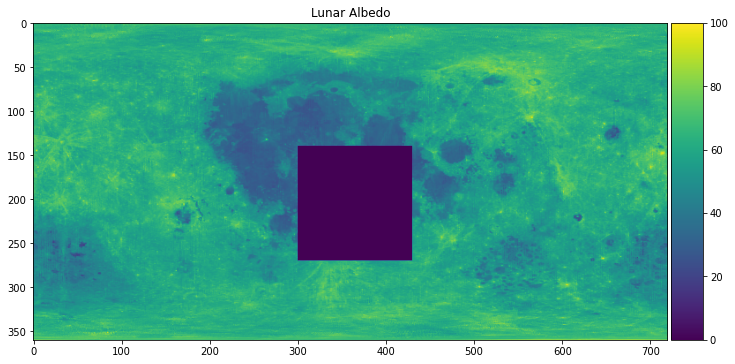

In [ ]:
# Albedo
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 9))

im = ax.imshow(albedo_data, vmax=100, vmin=0)
ax.set_title('Lunar Albedo')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

plt.show()

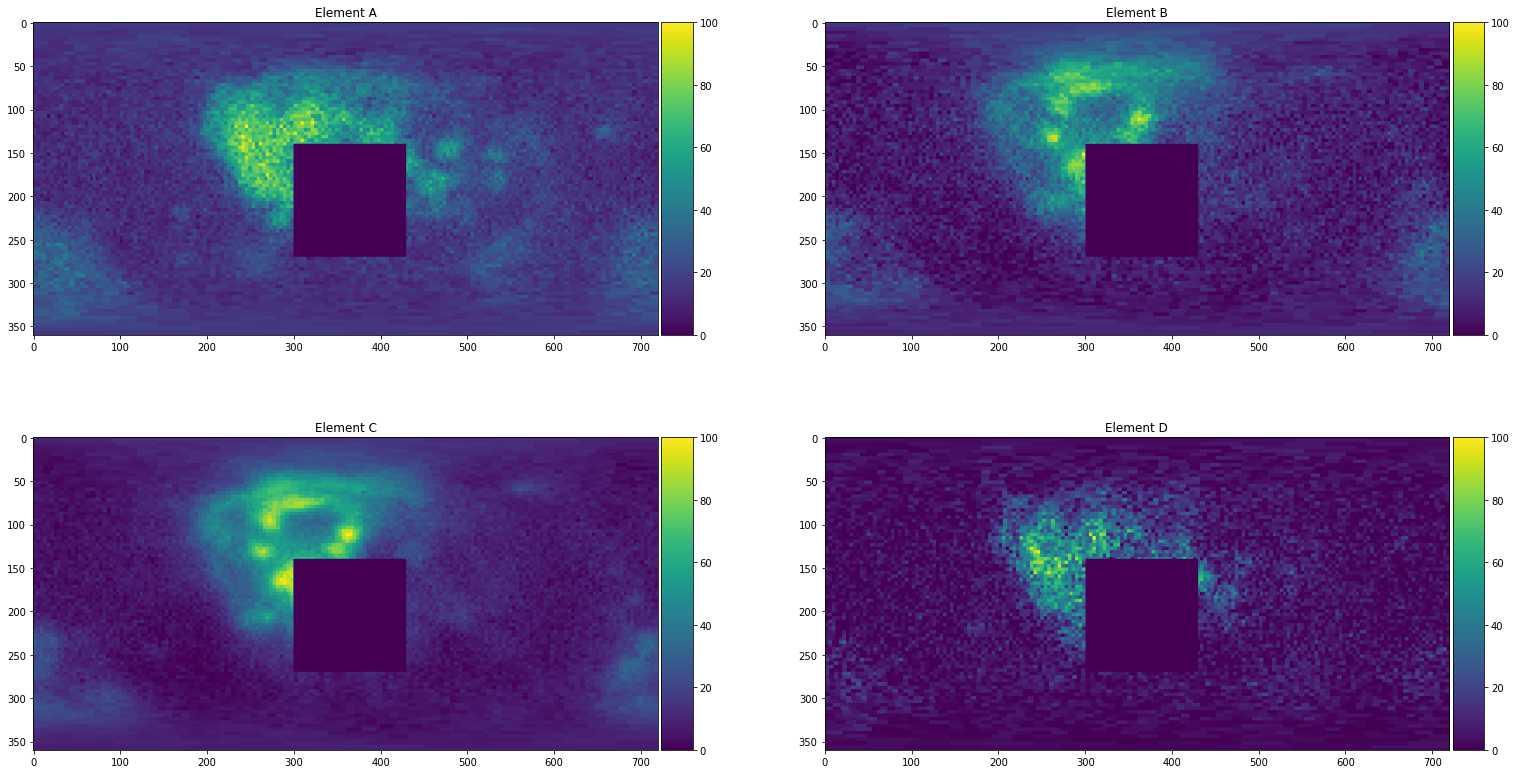

In [ ]:
# Elements
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(26, 14))

im = axs[0, 0].imshow(element_A_data, vmax=100, vmin=0)
axs[0, 0].set_title('Element A')
divider = make_axes_locatable(axs[0, 0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

im = axs[0, 1].imshow(element_B_data, vmax=100, vmin=0)
axs[0, 1].set_title('Element B')
divider = make_axes_locatable(axs[0, 1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

im = axs[1, 0].imshow(element_C_data, vmax=100, vmin=0)
axs[1, 0].set_title('Element C')
divider = make_axes_locatable(axs[1, 0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

im = axs[1, 1].imshow(element_D_data, vmax=100, vmin=0)
axs[1, 1].set_title('Element D')
divider = make_axes_locatable(axs[1, 1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

plt.show()

In [ ]:
# Flatten the data
albedo    = albedo_data.flatten()
element_A = element_A_data.flatten()
element_B = element_B_data.flatten()
element_C = element_C_data.flatten()
element_D = element_D_data.flatten()

flat_unmasked_indices = np.where(albedo > 0)
flat_masked_indices   = np.where(albedo == 0)
flat_mask = albedo == 0

### Split data into training and testing sets

In [ ]:
# Fraction of data that's used for training
train_split = 0.8

In [ ]:
# Get indices for each set (lets us reconstruct the map)
train_indices = np.random.choice([i for i in range(len(albedo))], 
                                  int(train_split*len(albedo)), 
                                  replace=False)

test_indices = np.delete([i for i in range(len(albedo))], train_indices)

albedo_train = albedo[train_indices]
albedo_test  = albedo[test_indices]

element_A_train = element_A[train_indices]
element_A_test  = element_A[test_indices]

element_B_train = element_B[train_indices]
element_B_test  = element_B[test_indices]

element_C_train = element_C[train_indices]
element_C_test  = element_C[test_indices]

element_D_train = element_D[train_indices]
element_D_test  = element_D[test_indices]

unmasked_train_indices = np.where(albedo_train > 0)
unmasked_test_indices  = np.where(albedo_test > 0)
masked_train_indices   = np.where(albedo_train == 0)
masked_test_indices    = np.where(albedo_test == 0)

### Plot train set

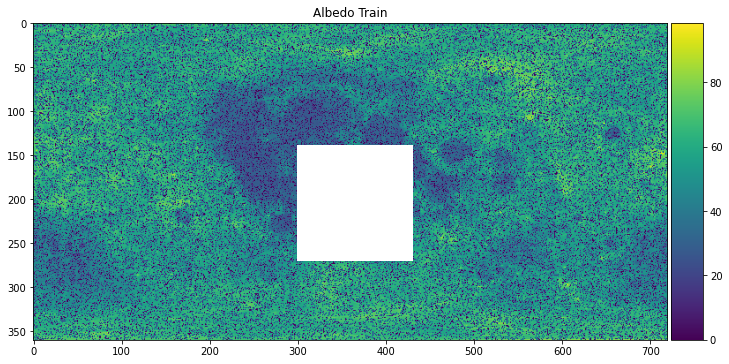

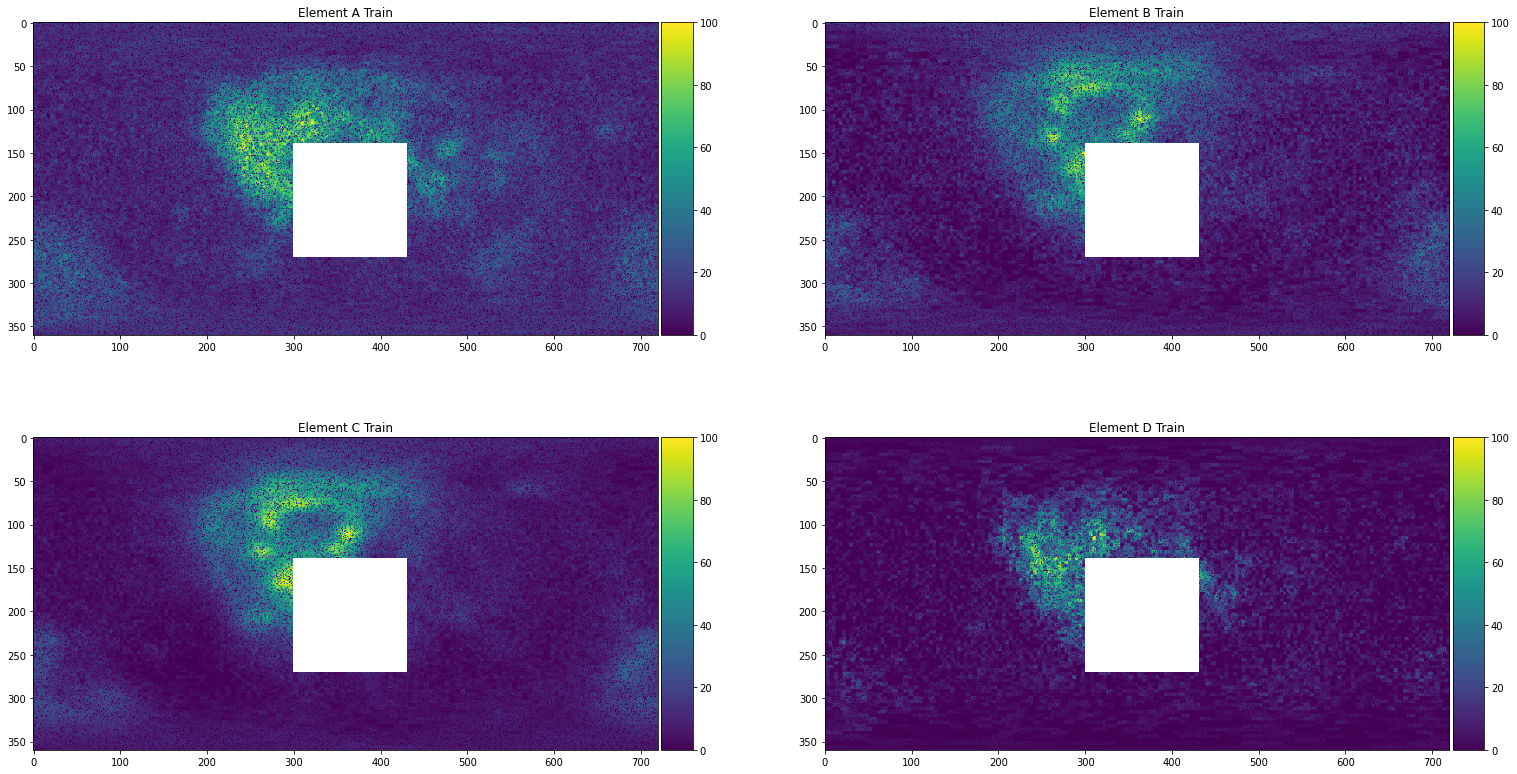

In [ ]:
this_albedo    = albedo.copy()
this_element_A = element_A.copy()
this_element_B = element_B.copy()
this_element_C = element_C.copy()
this_element_D = element_D.copy()

# Make all non-train data -1
this_albedo[test_indices]    = -1
this_element_A[test_indices] = -1
this_element_B[test_indices] = -1
this_element_C[test_indices] = -1
this_element_D[test_indices] = -1

# Mask withheld region
this_albedo    = np.ma.MaskedArray(this_albedo, flat_mask)
this_element_A = np.ma.MaskedArray(this_element_A, flat_mask)
this_element_B = np.ma.MaskedArray(this_element_B, flat_mask)
this_element_C = np.ma.MaskedArray(this_element_C, flat_mask)
this_element_D = np.ma.MaskedArray(this_element_D, flat_mask)

this_albedo    = this_albedo.reshape(data_shape)
this_element_A = this_element_A.reshape(data_shape)
this_element_B = this_element_B.reshape(data_shape)
this_element_C = this_element_C.reshape(data_shape)
this_element_D = this_element_D.reshape(data_shape)

# Plot albedo
fig, ax = plt.subplots(figsize=(12, 9))

im = ax.imshow(this_albedo, vmin=0)
ax.set_title('Albedo Train')
# Set Colorbars
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

# Plot elements
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(26, 14))

im = axs[0, 0].imshow(this_element_A, vmin=0, vmax=100)
axs[0, 0].set_title('Element A Train')
# Set Colorbars
divider = make_axes_locatable(axs[0, 0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

im = axs[0, 1].imshow(this_element_B, vmin=0, vmax=100)
axs[0, 1].set_title('Element B Train')
divider = make_axes_locatable(axs[0, 1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

im = axs[1, 0].imshow(this_element_C, vmin=0, vmax=100)
axs[1, 0].set_title('Element C Train')
divider = make_axes_locatable(axs[1, 0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

im = axs[1, 1].imshow(this_element_D, vmin=0, vmax=100)
axs[1, 1].set_title('Element D Train')
divider = make_axes_locatable(axs[1, 1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

plt.show()

### Plot test set

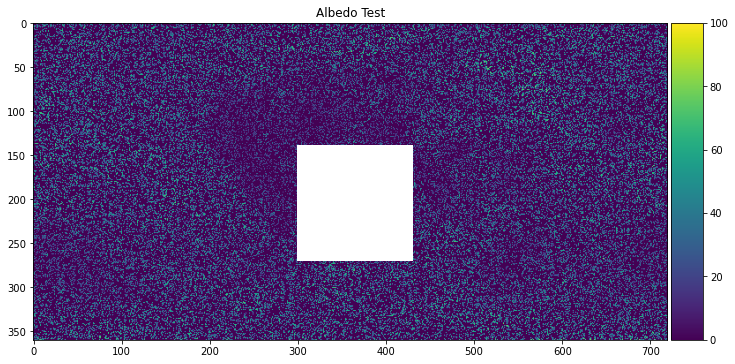

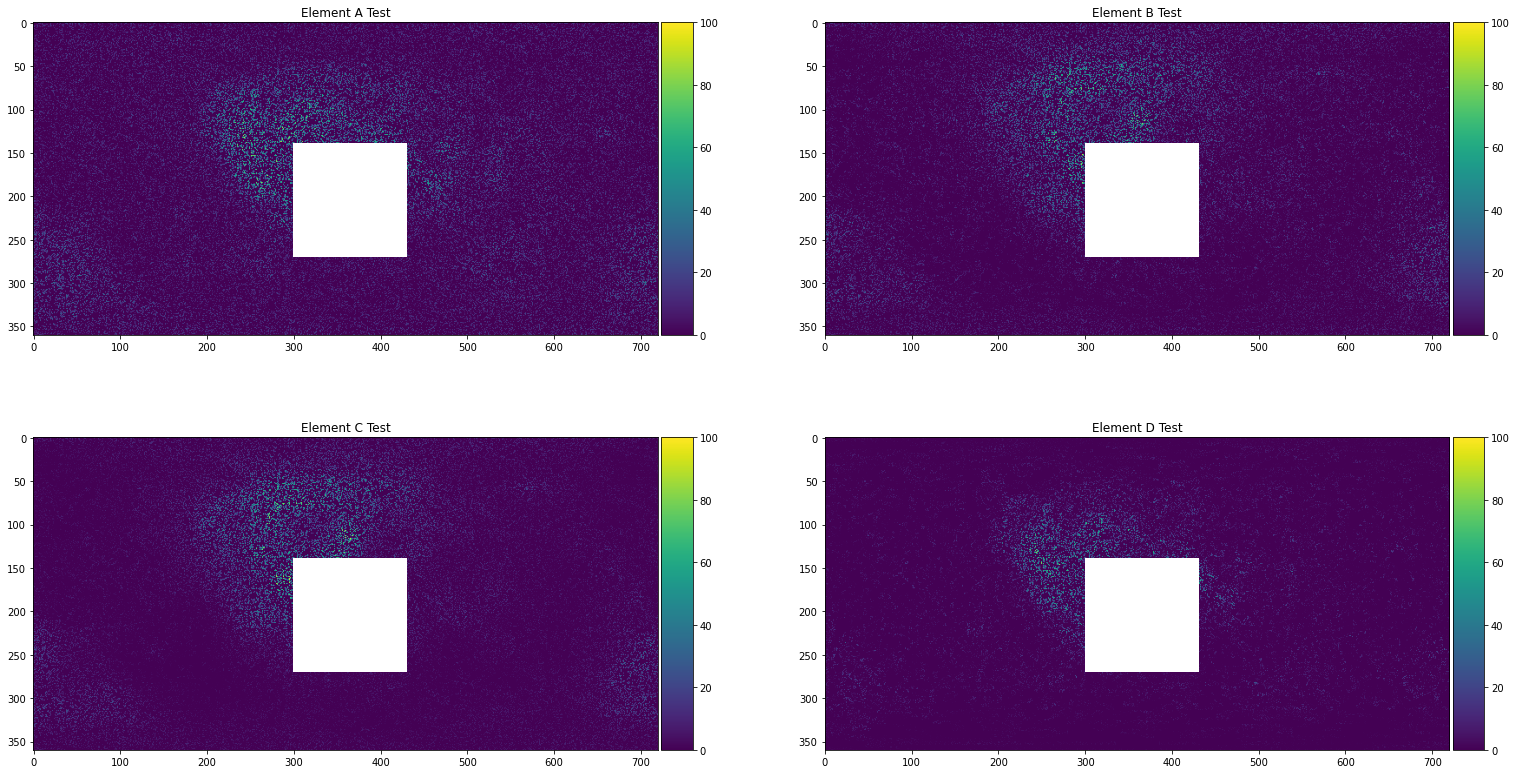

In [ ]:
this_albedo = albedo.copy()
this_element_A = element_A.copy()
this_element_B = element_B.copy()
this_element_C = element_C.copy()
this_element_D = element_D.copy()

# Make all non-test data -1
this_albedo[train_indices] = -1
this_element_A[train_indices] = -1
this_element_B[train_indices] = -1
this_element_C[train_indices] = -1
this_element_D[train_indices] = -1

# Mask withheld region
this_albedo = np.ma.MaskedArray(this_albedo, flat_mask)
this_element_A = np.ma.MaskedArray(this_element_A, flat_mask)
this_element_B = np.ma.MaskedArray(this_element_B, flat_mask)
this_element_C = np.ma.MaskedArray(this_element_C, flat_mask)
this_element_D = np.ma.MaskedArray(this_element_D, flat_mask)

this_albedo = this_albedo.reshape(data_shape)
this_element_A = this_element_A.reshape(data_shape)
this_element_B = this_element_B.reshape(data_shape)
this_element_C = this_element_C.reshape(data_shape)
this_element_D = this_element_D.reshape(data_shape)

# Plot albedo
fig, ax = plt.subplots(figsize=(12, 9))

im = ax.imshow(this_albedo, vmin=0, vmax=100)
ax.set_title('Albedo Test')
# Set Colorbars
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

# Plot elements
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(26, 14))

im = axs[0, 0].imshow(this_element_A, vmin=0, vmax=100)
axs[0, 0].set_title('Element A Test')
# Set Colorbars
divider = make_axes_locatable(axs[0, 0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

im = axs[0, 1].imshow(this_element_B, vmin=0, vmax=100)
axs[0, 1].set_title('Element B Test')
divider = make_axes_locatable(axs[0, 1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

im = axs[1, 0].imshow(this_element_C, vmin=0, vmax=100)
axs[1, 0].set_title('Element C Test')
divider = make_axes_locatable(axs[1, 0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

im = axs[1, 1].imshow(this_element_D, vmin=0, vmax=100)
axs[1, 1].set_title('Element D Test')
divider = make_axes_locatable(axs[1, 1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

plt.show()

### Finish modifying data

In [ ]:
# # Get rid of masked region
albedo_train = albedo_train[unmasked_train_indices]
element_A_train = element_A_train[unmasked_train_indices]
element_B_train = element_B_train[unmasked_train_indices]
element_C_train = element_C_train[unmasked_train_indices]
element_D_train = element_D_train[unmasked_train_indices]

In [ ]:
# Sklearn requires that each entry be its own array
albedo_train = albedo_train.reshape(len(albedo_train), 1)
element_A_train = element_A_train.reshape(len(element_A_train), 1)
element_B_train = element_B_train.reshape(len(element_B_train), 1)
element_C_train = element_C_train.reshape(len(element_C_train), 1)
element_D_train = element_D_train.reshape(len(element_D_train), 1)

albedo_test = albedo_test.reshape(len(albedo_test), 1)
element_A_test = element_A_test.reshape(len(element_A_test), 1)
element_B_test = element_B_test.reshape(len(element_B_test), 1)
element_C_test = element_C_test.reshape(len(element_C_test), 1)
element_D_test = element_D_test.reshape(len(element_D_test), 1)

## Model Train

In [ ]:
!pip install catboost
from catboost import CatBoostRegressor
element_A_model = CatBoostRegressor(verbose=0, depth=8, iterations=600, l2_leaf_reg=5)
element_B_model = CatBoostRegressor(verbose=0, depth=8, iterations=600, l2_leaf_reg=5)
element_C_model = CatBoostRegressor(verbose=0, depth=8, iterations=600, l2_leaf_reg=5)
element_D_model = CatBoostRegressor(verbose=0, depth=8, iterations=600, l2_leaf_reg=5)

element_A_model.fit(albedo_train, element_A_train)
element_B_model.fit(albedo_train, element_B_train)
element_C_model.fit(albedo_train, element_C_train)
element_D_model.fit(albedo_train, element_D_train)

## Predict

In [ ]:
element_A_pred = element_A_model.predict(albedo_test)
element_B_pred = element_B_model.predict(albedo_test)
element_C_pred = element_C_model.predict(albedo_test)
element_D_pred = element_D_model.predict(albedo_test)

## Score

In [ ]:
# Only score using unmasked regions
element_A_mse = mean_squared_error(element_A_test[unmasked_test_indices], element_A_pred[unmasked_test_indices])
element_B_mse = mean_squared_error(element_B_test[unmasked_test_indices], element_B_pred[unmasked_test_indices])
element_C_mse = mean_squared_error(element_C_test[unmasked_test_indices], element_C_pred[unmasked_test_indices])
element_D_mse = mean_squared_error(element_D_test[unmasked_test_indices], element_D_pred[unmasked_test_indices])

In [ ]:
score = element_A_mse + element_B_mse + element_C_mse + element_D_mse
print('Sum of mean-squared errors = %.5f' % (score))

Sum of mean-squared errors = 362.70144


In [ ]:
pickle.dump(element_A_model, open('./element_A_model.sav', 'wb'))
pickle.dump(element_B_model, open('./element_B_model.sav', 'wb'))
pickle.dump(element_C_model, open('./element_C_model.sav', 'wb'))
pickle.dump(element_D_model, open('./element_D_model.sav', 'wb'))

## Save results

In [ ]:
# Map that only looks at test data (train pixels = -1e6 to ensure no overlap with predictions)
reconstructed_A_predictions = np.zeros(len(element_B)) - 1e6
reconstructed_B_predictions = np.zeros(len(element_B)) - 1e6
reconstructed_C_predictions = np.zeros(len(element_B)) - 1e6
reconstructed_D_predictions = np.zeros(len(element_B)) - 1e6

# Fill in predicted values
for (i, index) in enumerate(test_indices):
    reconstructed_A_predictions[index] = element_A_pred[i]
    reconstructed_B_predictions[index] = element_B_pred[i]
    reconstructed_C_predictions[index] = element_C_pred[i]
    reconstructed_D_predictions[index] = element_D_pred[i]
        
# Reshape into images
reconstructed_A_predictions = reconstructed_A_predictions.reshape(data_shape)
reconstructed_B_predictions = reconstructed_B_predictions.reshape(data_shape)
reconstructed_C_predictions = reconstructed_C_predictions.reshape(data_shape)
reconstructed_D_predictions = reconstructed_D_predictions.reshape(data_shape)

# Get coordinates of pixel
xs, ys = [], []
A_values, B_values, C_values, D_values = [], [], [], []

for i in range(len(reconstructed_A_predictions)):
    for j in range(len(reconstructed_A_predictions[i])):
        if reconstructed_A_predictions[i][j] == -1e6:
            continue
        xs.append(i)
        ys.append(j)
        A_values.append(reconstructed_A_predictions[i][j])
        B_values.append(reconstructed_B_predictions[i][j])
        C_values.append(reconstructed_C_predictions[i][j])
        D_values.append(reconstructed_D_predictions[i][j])

        
# Save
with open('./element_A_predictions.txt', 'w') as f:
    for i in range(len(xs)):
        this_str = '%i, %i, %f \n' % (xs[i], ys[i], A_values[i])
        f.write(this_str)
        
with open('./element_B_predictions.txt', 'w') as f:
    for i in range(len(xs)):
        this_str = '%i, %i, %f \n' % (xs[i], ys[i], A_values[i])
        f.write(this_str)
        
with open('./element_C_predictions.txt', 'w') as f:
    for i in range(len(xs)):
        this_str = '%i, %i, %f \n' % (xs[i], ys[i], A_values[i])
        f.write(this_str)
        
with open('./element_D_predictions.txt', 'w') as f:
    for i in range(len(xs)):
        this_str = '%i, %i, %f \n' % (xs[i], ys[i], A_values[i])
        f.write(this_str)



# Optional Diagnostic Plots

### Reconstruct map using predictions

In [ ]:
# Entire map
reconstructed_element_A = element_A.copy()
reconstructed_element_B = element_B.copy()
reconstructed_element_C = element_C.copy()
reconstructed_element_D = element_D.copy()

for (i, index) in enumerate(test_indices):
    
    # If the predicted pixel is unmasked, put it in the new map
    if index in flat_unmasked_indices[0]:
        reconstructed_element_A[index] = element_A_pred[i]
        reconstructed_element_B[index] = element_B_pred[i]
        reconstructed_element_C[index] = element_C_pred[i]
        reconstructed_element_D[index] = element_D_pred[i]

    else:
        reconstructed_element_A[index] = 0
        reconstructed_element_B[index] = 0
        reconstructed_element_C[index] = 0
        reconstructed_element_D[index] = 0 
        
# Make withheld region
reconstructed_element_A = np.ma.MaskedArray(reconstructed_element_A, flat_mask)
reconstructed_element_B = np.ma.MaskedArray(reconstructed_element_B, flat_mask)
reconstructed_element_C = np.ma.MaskedArray(reconstructed_element_C, flat_mask)
reconstructed_element_D = np.ma.MaskedArray(reconstructed_element_D, flat_mask)

# Reshape into image
reconstructed_element_A = reconstructed_element_A.reshape(data_shape)
reconstructed_element_B = reconstructed_element_B.reshape(data_shape)
reconstructed_element_C = reconstructed_element_C.reshape(data_shape)
reconstructed_element_D = reconstructed_element_D.reshape(data_shape)

### Plot reconstructed map (including training data)

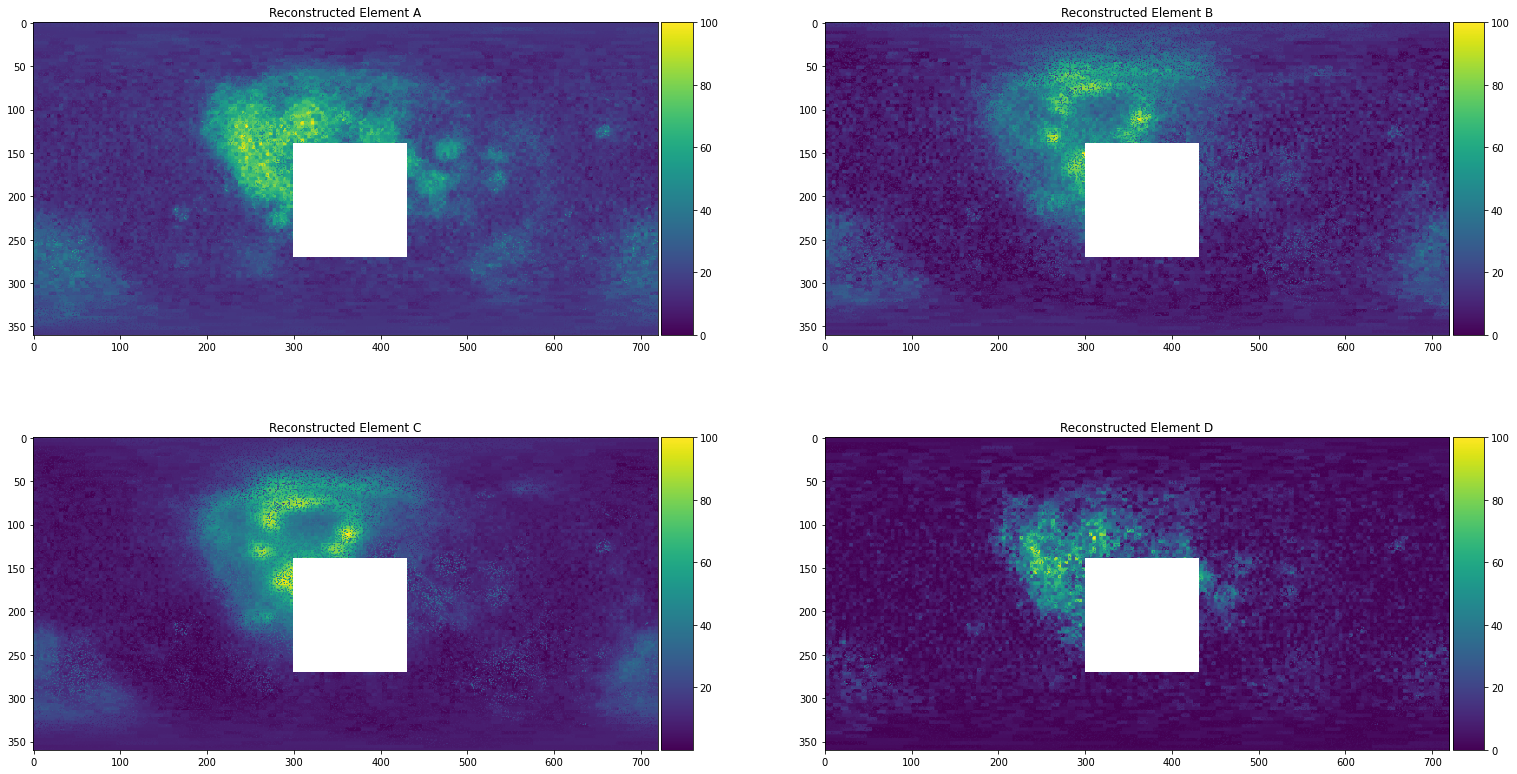

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(26, 14))

im = axs[0, 0].imshow(reconstructed_element_A)
axs[0, 0].set_title('Reconstructed Element A')
# Set Colorbars
divider = make_axes_locatable(axs[0, 0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

im = axs[0, 1].imshow(reconstructed_element_B)
axs[0, 1].set_title('Reconstructed Element B')
divider = make_axes_locatable(axs[0, 1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

im = axs[1, 0].imshow(reconstructed_element_C)
axs[1, 0].set_title('Reconstructed Element C')
divider = make_axes_locatable(axs[1, 0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

im = axs[1, 1].imshow(reconstructed_element_D)
axs[1, 1].set_title('Reconstructed Element D')
divider = make_axes_locatable(axs[1, 1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

plt.show()

### Plot difference between predicted and actual maps

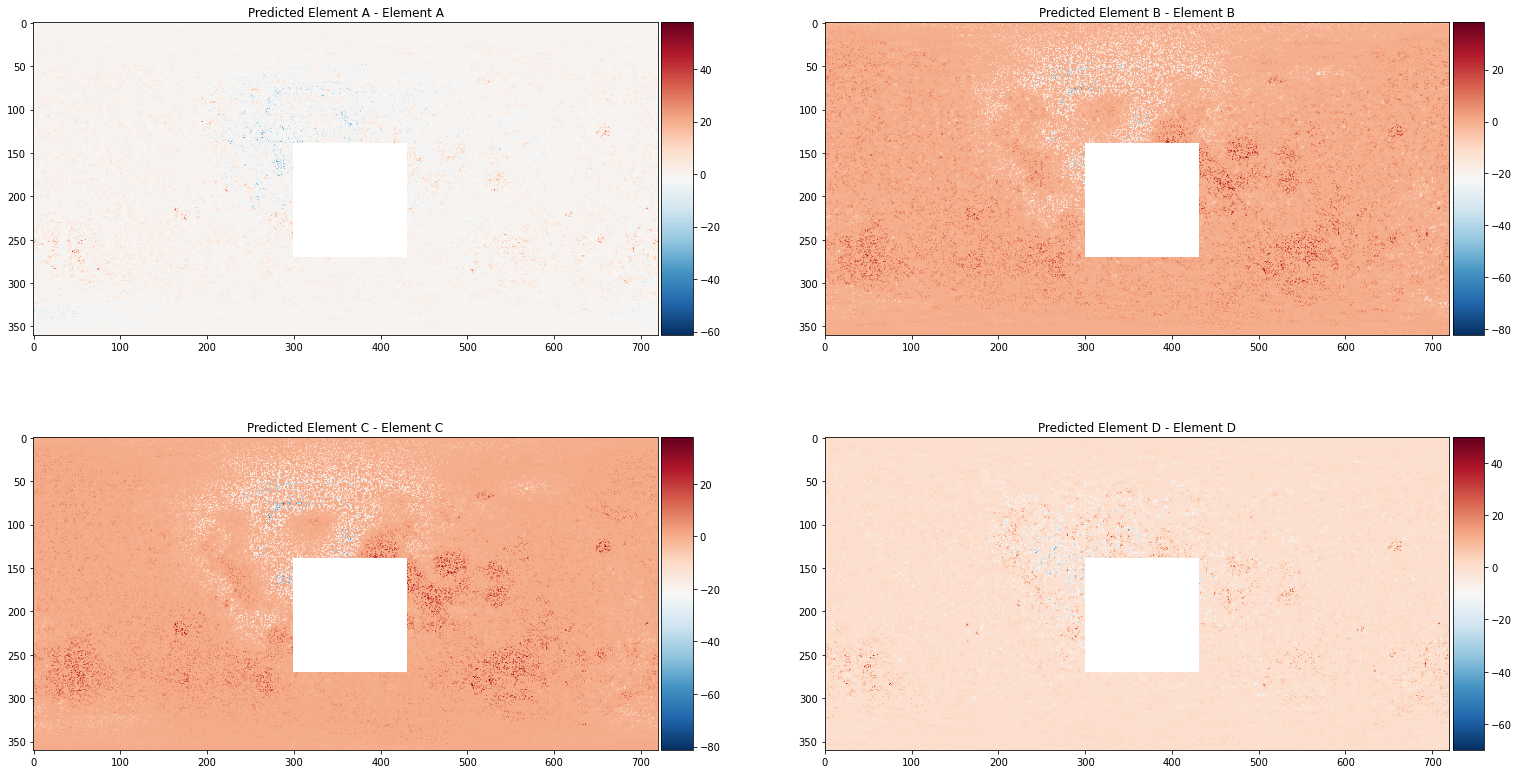

In [ ]:
# Plot difference between prediction and true
difference_A = reconstructed_element_A - np.ma.MaskedArray(element_A_data, flat_mask)
difference_B = reconstructed_element_B - np.ma.MaskedArray(element_B_data, flat_mask)
difference_C = reconstructed_element_C - np.ma.MaskedArray(element_C_data, flat_mask)
difference_D = reconstructed_element_D - np.ma.MaskedArray(element_D_data, flat_mask)

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(26, 14))

im = axs[0, 0].imshow(difference_A, cmap='RdBu_r')
axs[0, 0].set_title('Predicted Element A - Element A')
# Set Colorbars
divider = make_axes_locatable(axs[0, 0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

im = axs[0, 1].imshow(difference_B, cmap='RdBu_r')
axs[0, 1].set_title('Predicted Element B - Element B')
divider = make_axes_locatable(axs[0, 1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

im = axs[1, 0].imshow(difference_C, cmap='RdBu_r')
axs[1, 0].set_title('Predicted Element C - Element C')
divider = make_axes_locatable(axs[1, 0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

im = axs[1, 1].imshow(difference_D, cmap='RdBu_r')
axs[1, 1].set_title('Predicted Element D - Element D')
divider = make_axes_locatable(axs[1, 1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

plt.show()